In [15]:
import pandas as pd
import numpy as np

In [18]:
# Timestamp
pd.Timestamp('13th April 2025 1:10PM').hour


# DatetimeIndex
pd.DatetimeIndex([pd.Timestamp('13th April 2025 1:10PM'), pd.Timestamp('13th March 2025 1:10PM'), pd.Timestamp('13th May 2025 1:10PM')])


# date_range()
pd.date_range(start='2023-1-6', end='2025-4-13', freq='ME')


# to_datetime()
s = pd.Series(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31'])

pd.to_datetime(s).dt.month_name()


0      January
1     February
2        March
3        April
4          May
5         June
6         July
7       August
8    September
9      October
dtype: object

### Timedelta Object

Represents a duration, the difference between two dates or times.

In [22]:
# Create Using Timestamp Objects

t1 = pd.Timestamp('11th April 2025 4:30PM')
t2 = pd.Timestamp('18th April 2025 8:30AM')

t2-t1

Timedelta('6 days 16:00:00')

In [26]:
# Standalone Creation


pd.Timedelta(days=2, hours=10, minutes=45, seconds=35)

Timedelta('2 days 10:45:35')

In [27]:
# Arithmetic


pd.Timestamp('13th April 2025') + pd.Timedelta(days=2, hours=10, minutes=45, seconds=35)

Timestamp('2025-04-15 10:45:35')

In [31]:
pd.date_range(start='2024-1-6', end='2025-1-5', freq='D') + pd.Timedelta(days=2, hours=10, minutes=45, seconds=35)

DatetimeIndex(['2024-01-08 10:45:35', '2024-01-09 10:45:35',
               '2024-01-10 10:45:35', '2024-01-11 10:45:35',
               '2024-01-12 10:45:35', '2024-01-13 10:45:35',
               '2024-01-14 10:45:35', '2024-01-15 10:45:35',
               '2024-01-16 10:45:35', '2024-01-17 10:45:35',
               ...
               '2024-12-29 10:45:35', '2024-12-30 10:45:35',
               '2024-12-31 10:45:35', '2025-01-01 10:45:35',
               '2025-01-02 10:45:35', '2025-01-03 10:45:35',
               '2025-01-04 10:45:35', '2025-01-05 10:45:35',
               '2025-01-06 10:45:35', '2025-01-07 10:45:35'],
              dtype='datetime64[ns]', length=366, freq='D')

In [32]:
# Real Life Example

df = pd.read_csv("C:\\Users\\ACER\\Desktop\\DSMP1\\Datasets\\datasets-session-22\\deliveries.csv")
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [35]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_10108\3472121163.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date'] = pd.to_datetime(df['delivery_date'])


In [39]:
df['deliver_time_period'] = df['delivery_date'] - df['order_date']
df.head()

,order_date,delivery_date,deliver_time_period
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days


In [40]:
df['deliver_time_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [41]:
google = pd.read_csv("C:\\Users\\ACER\\Desktop\\DSMP1\\Datasets\\datasets-session-22\\google.csv")
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [47]:
subs = pd.read_csv("C:\\Users\\ACER\\Desktop\\DSMP1\\Datasets\\Apurba1903 YT\\subscribers.csv")
views = pd.read_csv("C:\\Users\\ACER\\Desktop\\DSMP1\\Datasets\\Apurba1903 YT\\views.csv")
wt = pd.read_csv("C:\\Users\\ACER\\Desktop\\DSMP1\\Datasets\\Apurba1903 YT\\watchtime.csv")
comments = pd.read_csv("C:\\Users\\ACER\\Desktop\\DSMP1\\Datasets\\Apurba1903 YT\\comments.csv")

In [51]:
subs

,Date,Subscribers
0,2017-06-06,3
1,2017-06-07,2
2,2017-06-08,0
3,2017-06-09,0
4,2017-06-10,0
...,...,...
2862,2025-04-07,0
2863,2025-04-08,0
2864,2025-04-09,0
2865,2025-04-10,0


In [55]:
yt = subs.merge(views, on='Date').merge(wt, on='Date').merge(comments, on='Date')

In [56]:
yt.head()

,Date,Subscribers,Views,Watch time (hours),Comments added
0,2017-06-06,3,0,0.0,0
1,2017-06-07,2,0,0.0,0
2,2017-06-08,0,0,0.0,0
3,2017-06-09,0,0,0.0,0
4,2017-06-10,0,0,0.0,0


In [58]:
google['Date'] = pd.to_datetime(google['Date'])
yt['Date'] = pd.to_datetime(yt['Date'])

In [61]:
google.set_index('Date', inplace=True)
yt.set_index('Date', inplace=True)

In [ ]:
# Fetch a Specific Date

yt.loc['2019-01-01']

google.loc['2019-12-31']

Open           1330.109985
High           1338.000000
Low            1329.084961
Close          1337.020020
Adj Close      1337.020020
Volume       961800.000000
Name: 2019-12-31 00:00:00, dtype: float64

In [69]:
# Partial Indexing -> Select a Particular Year/Month

yt.loc['2019']

,Subscribers,Views,Watch time (hours),Comments added
Date,,,,
2019-01-01,0,7,0.1334,0
2019-01-02,0,0,0.0000,0
2019-01-03,0,1,0.0223,0
2019-01-04,0,1,0.0304,0
2019-01-05,0,0,0.0000,0
...,...,...,...,...
2019-12-27,0,0,0.0000,0
2019-12-28,0,1,0.0108,0
2019-12-29,0,0,0.0000,0


In [74]:
# Create Year Month_Name and Day_Name

yt['Month_Name'] = yt.index.month_name()
yt['Week_Day_Name'] = yt.index.day_name()
yt['Quarter'] = yt.index.quarter

In [75]:
yt.head()

,Subscribers,Views,Watch time (hours),Comments added,Month_Name,Week_Day_Name,Quarter
Date,,,,,,,
2017-06-06,3,0,0.0,0,June,Tuesday,2
2017-06-07,2,0,0.0,0,June,Wednesday,2
2017-06-08,0,0,0.0,0,June,Thursday,2
2017-06-09,0,0,0.0,0,June,Friday,2
2017-06-10,0,0,0.0,0,June,Saturday,2


In [77]:
google['Month_Name'] = google.index.month_name()
google['Week_Day_Name'] = google.index.day_name()
google['Quarter'] = google.index.quarter

In [78]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Week_Day_Name,Quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


In [79]:
# Slicing

yt.loc['2018-1-1':'2019-1-1']

,Subscribers,Views,Watch time (hours),Comments added,Month_Name,Week_Day_Name,Quarter
Date,,,,,,,
2018-01-01,0,1,0.0378,0,January,Monday,1
2018-01-02,0,0,0.0000,0,January,Tuesday,1
2018-01-03,0,8,0.2970,0,January,Wednesday,1
2018-01-04,1,3,0.2241,0,January,Thursday,1
2018-01-05,0,4,0.0707,0,January,Friday,1
...,...,...,...,...,...,...,...
2018-12-28,0,5,0.0851,0,December,Friday,4
2018-12-29,0,2,0.2352,0,December,Saturday,4
2018-12-30,0,3,0.0209,0,December,Sunday,4


In [84]:
# Challenge -> Fetch info for a particular date every year -> limitation of timedelta

google[google.index.isin(pd.date_range(start='2005-1-6', end='2022-1-6', freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Week_Day_Name,Quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,1


<Axes: xlabel='Date'>

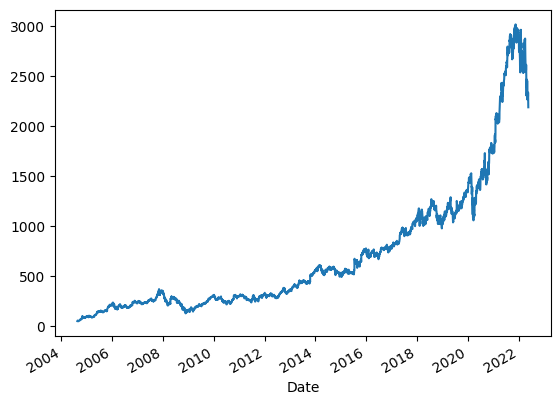

In [ ]:
# Visualize a Single Column

google['Close'].plot(kind='line')

<Axes: xlabel='Date'>

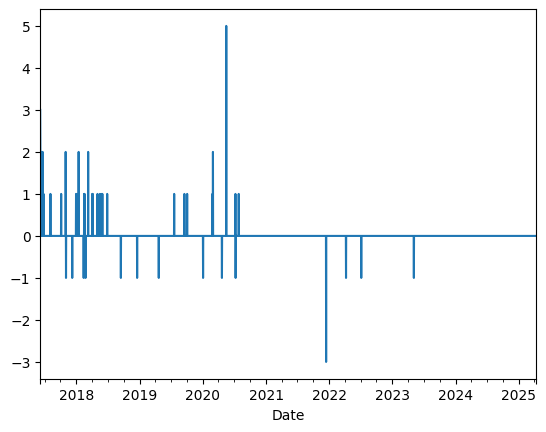

In [86]:
yt['Subscribers'].plot(kind='line')

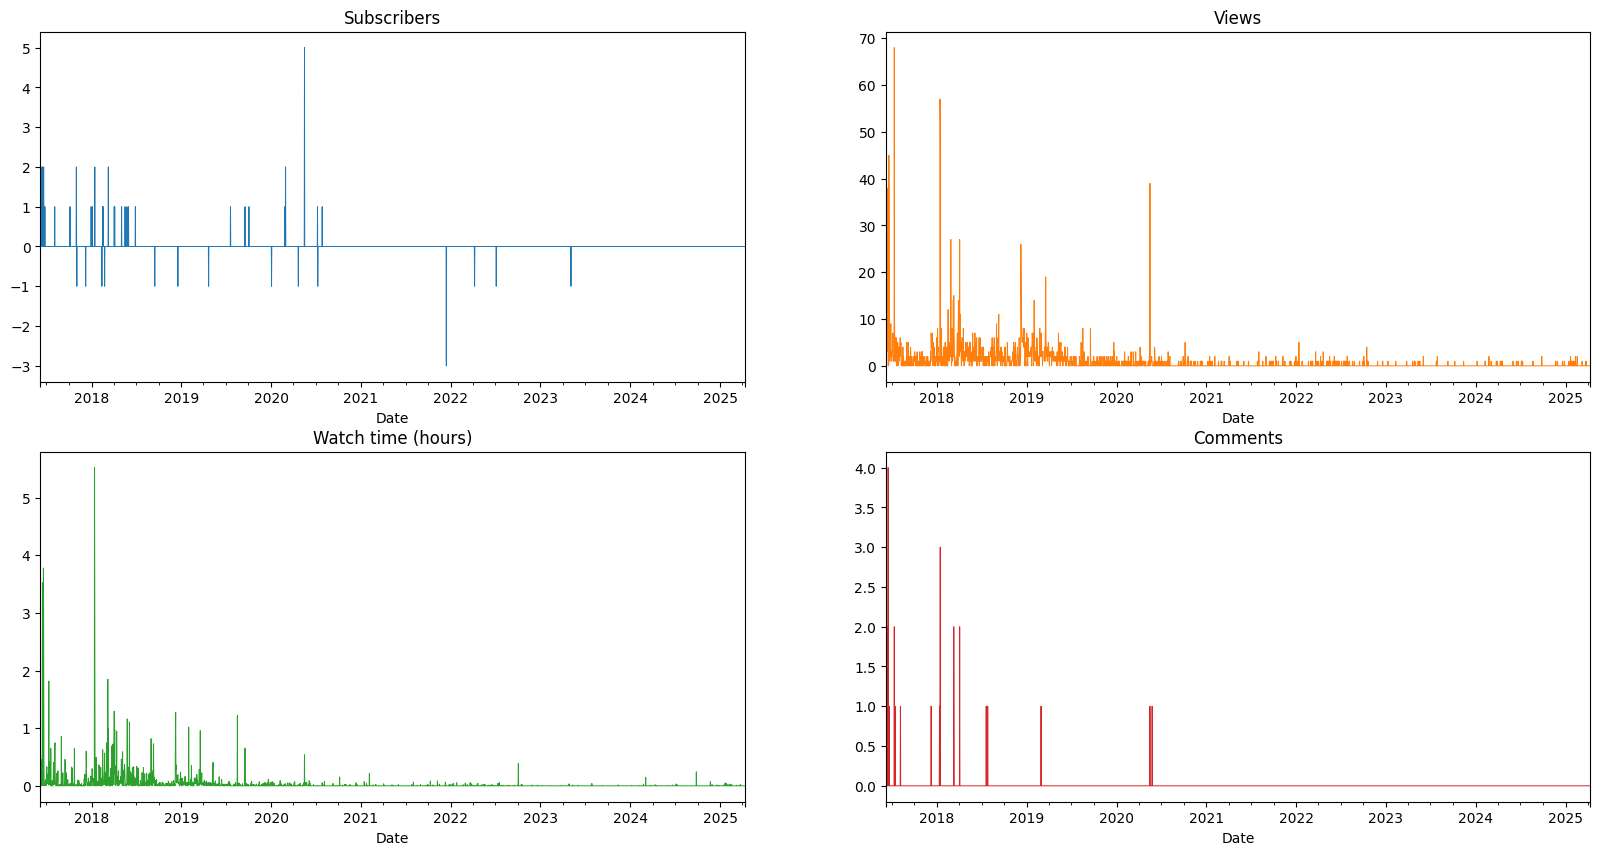

In [90]:
# Visualize all Columns Together

sunset_yt = yt[['Subscribers' , 'Views' , 'Watch time (hours)', 'Comments added']]

ax = sunset_yt.plot(   
                subplots = True,
                layout = (2, 2),
                sharex = False,
                sharey = False,
                linewidth = 0.7,
                fontsize = 10,
                legend = False,
                figsize = (20, 10),
                title = ['Subscribers' , 'Views' , 'Watch time (hours)', 'Comments']
            )

### Plot for a particular year/month/week

<Axes: xlabel='Date'>

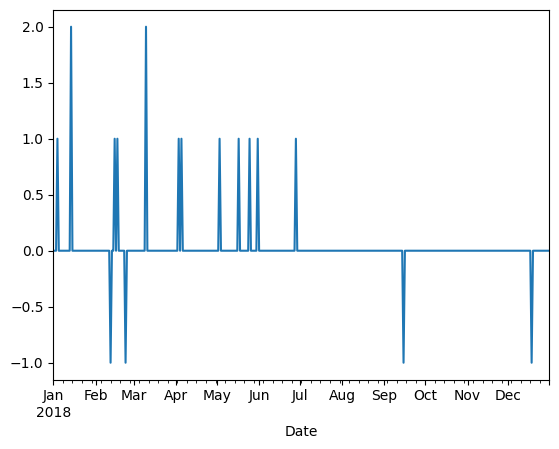

In [ ]:
# Year

yt.loc['2018']['Subscribers'].plot()

<Axes: xlabel='Date'>

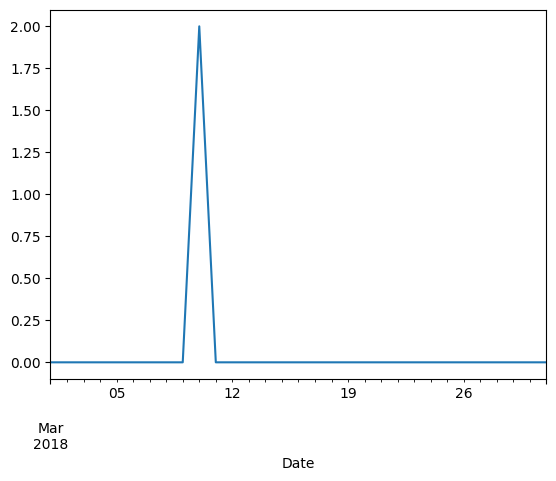

In [ ]:
# Month

yt.loc['2018-3']['Subscribers'].plot()

<Axes: xlabel='Date'>

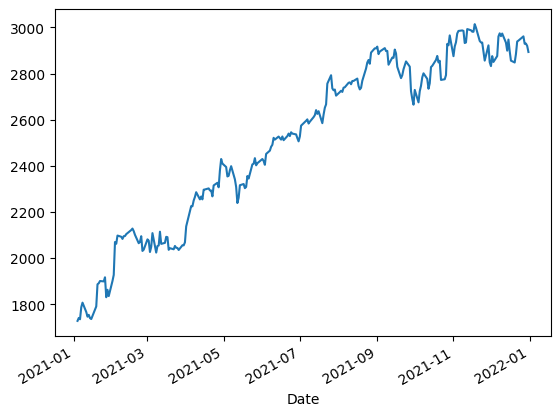

In [ ]:
# Year

google.loc['2021']['Close'].plot()

<Axes: xlabel='Date'>

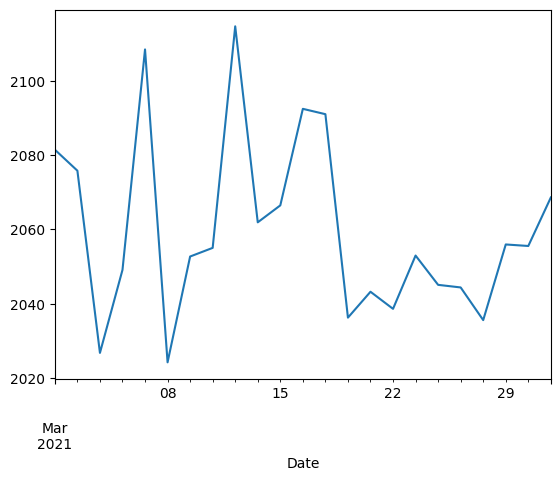

In [ ]:
# Month

google.loc['2021-3']['Close'].plot()

<Axes: xlabel='Month_Name'>

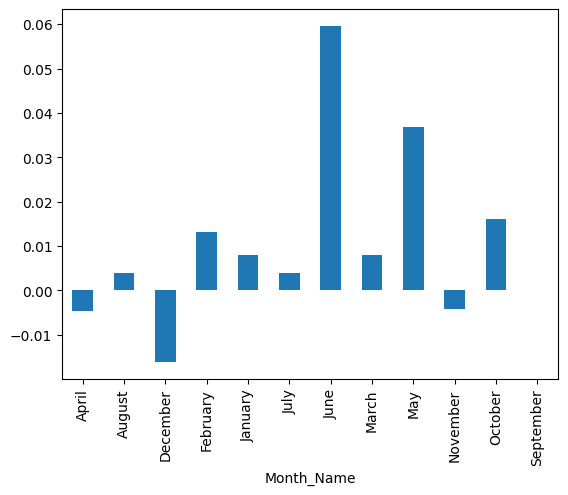

In [ ]:
# Monthly Trend

yt.groupby('Month_Name')['Subscribers'].mean().plot(kind='bar')

<Axes: xlabel='Week_Day_Name'>

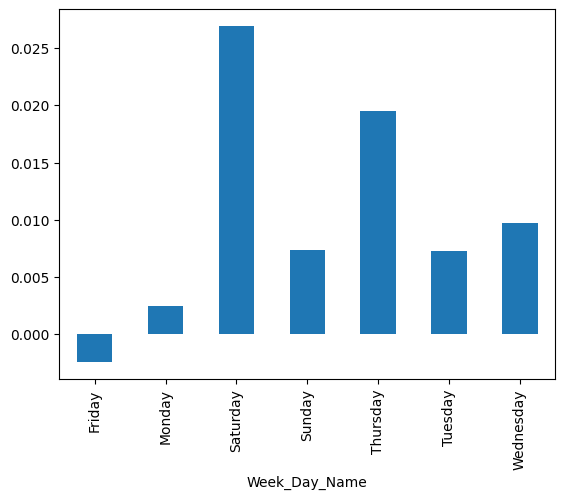

In [ ]:
# Weekly Tread

yt.groupby('Week_Day_Name')['Subscribers'].mean().plot(kind='bar')

<Axes: xlabel='Month_Name'>

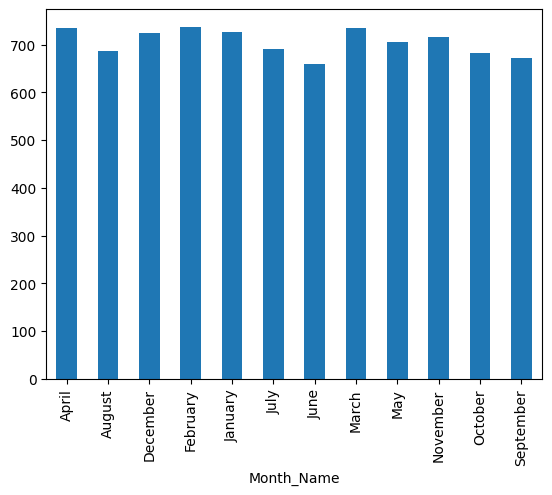

In [126]:
# Monthly Tread

google.groupby('Month_Name')['Close'].mean().plot(kind='bar')

<Axes: xlabel='Quarter'>

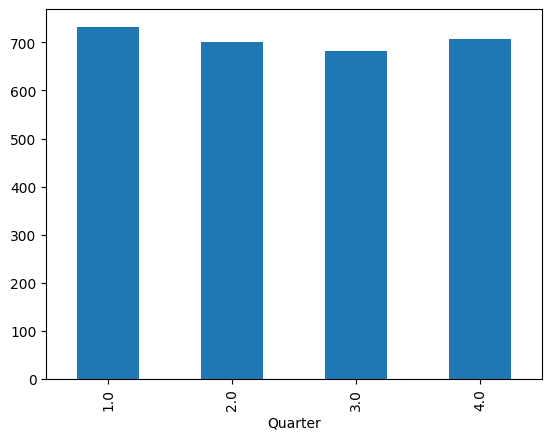

In [ ]:
# Quarterly Trend

google.groupby('Quarter')['Close'].mean().plot(kind='bar')

<Axes: xlabel='Date'>

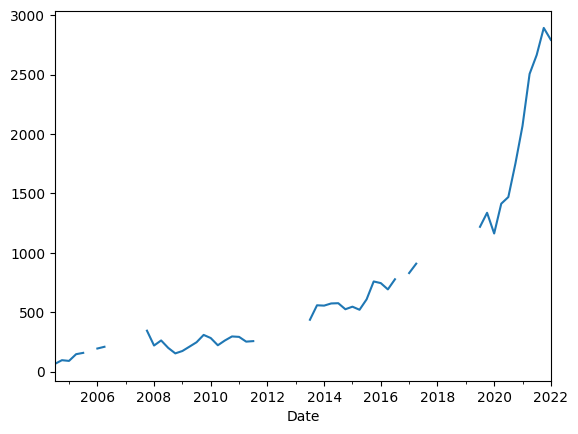

In [119]:
# Quarterly Trend

google['Close'].asfreq('QE').plot()

In [107]:
# Frequency

google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4632, freq='B')

In [117]:
# asfreq

google.asfreq('6h', method='ffill')

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Week_Day_Name,Quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 06:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 12:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 18:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 06:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 12:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0


### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

C:\Users\ACER\AppData\Local\Temp\ipykernel_10108\3347655372.py:4: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  google['Close'].resample('QE').mean().plot(figsize = (20, 10))


<Axes: xlabel='Date'>

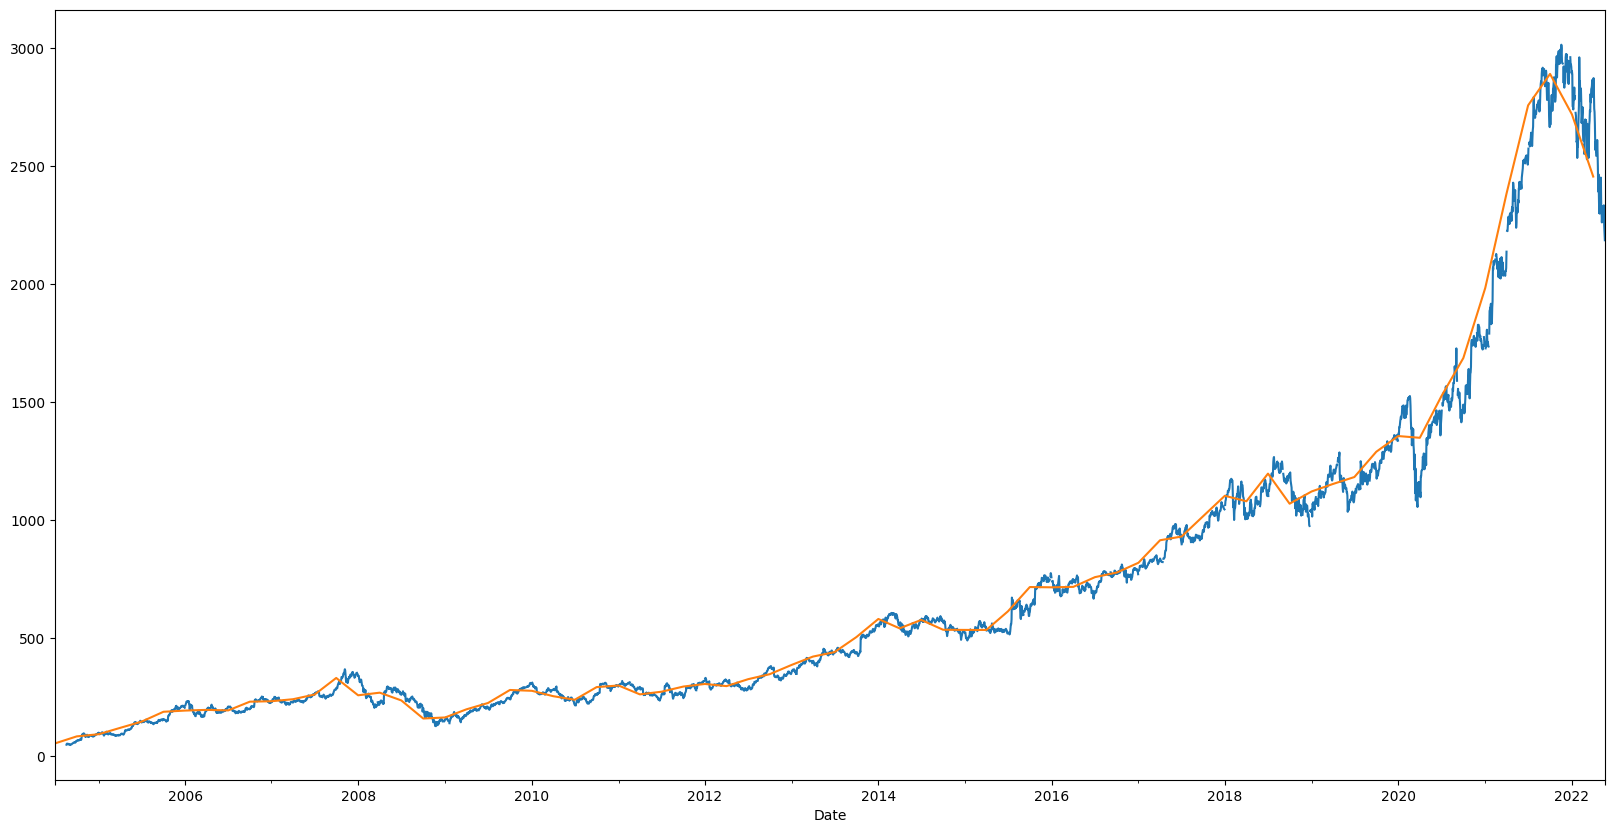

In [142]:
# Downsampling

google['Close'].plot(figsize = (20, 10))
google['Close'].resample('QE').mean().plot(figsize = (20, 10))

<Axes: xlabel='Date'>

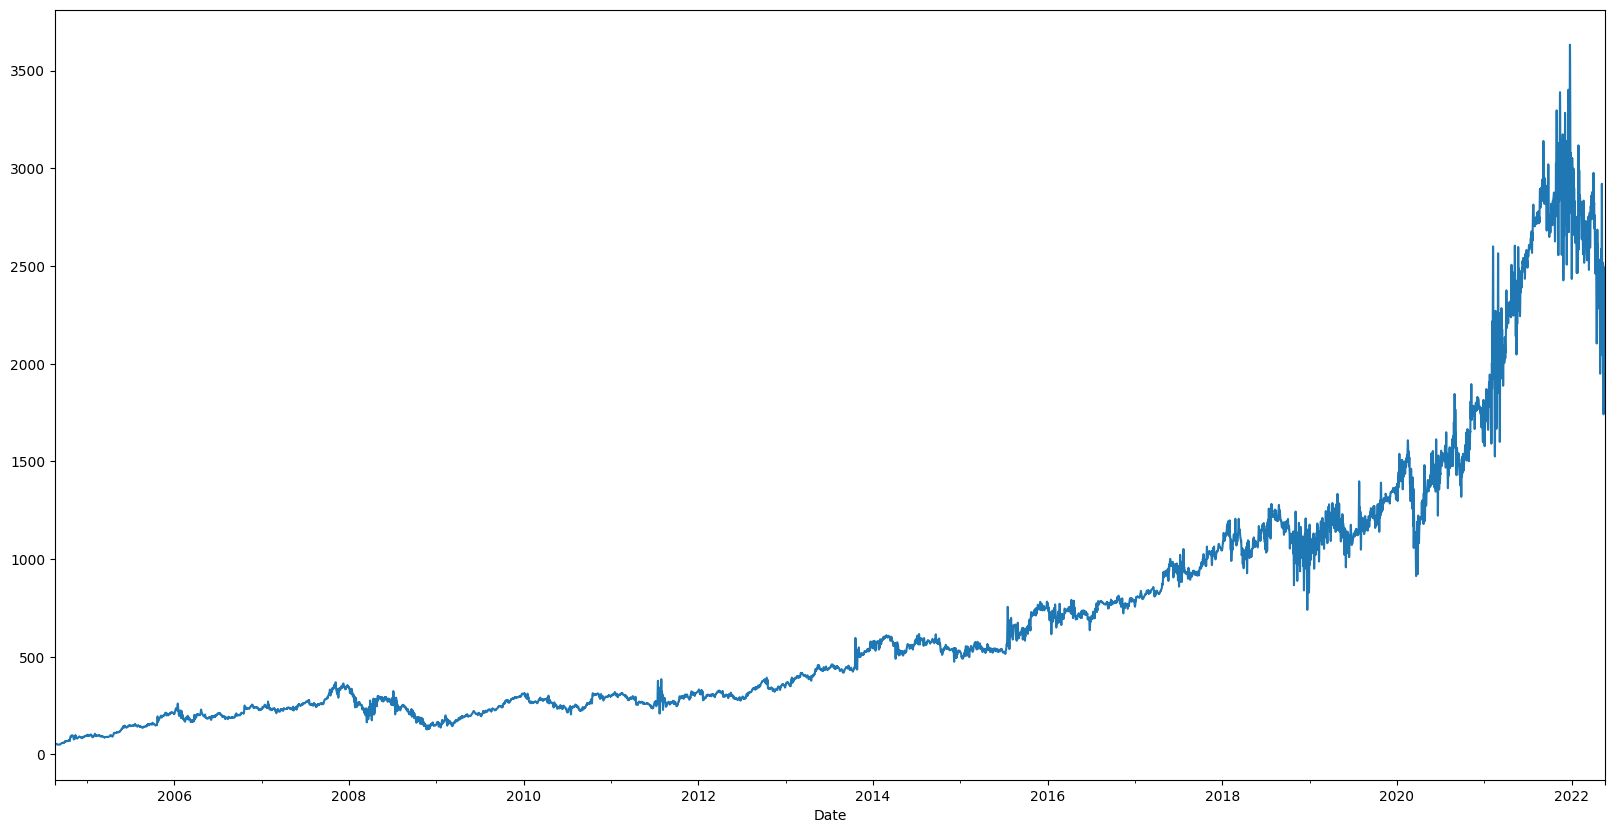

In [150]:
# Upsampling

google['Close'].resample('h').interpolate(method='spline', order = 2).plot(figsize = (20, 10))

### Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data.

<Axes: xlabel='Date'>

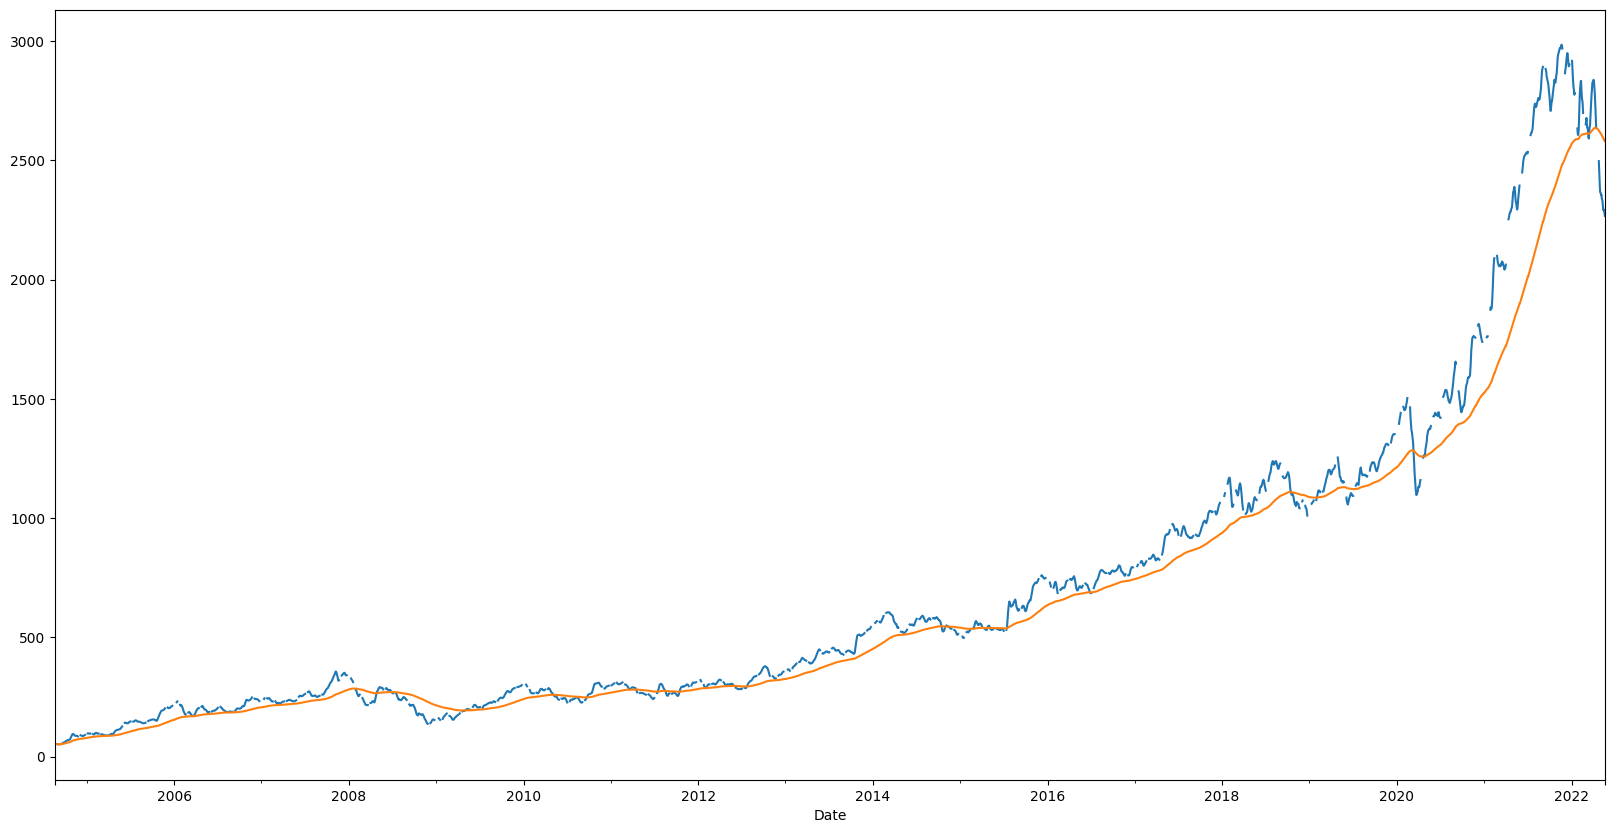

In [171]:
# Rolling Window

google['Close'].rolling(7).mean().plot(figsize=(20,10))
google['Close'].ewm(120).mean().plot(figsize=(20,10))

### Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [ ]:
# shift

google['Close'].shift(2)

Date
2004-08-19            NaN
2004-08-20      49.982655
2004-08-23      53.952770
2004-08-24      54.495735
2004-08-25      52.239197
                 ...     
2022-05-16    2330.310059
2022-05-17    2295.850098
2022-05-18    2334.030029
2022-05-19    2248.020020
2022-05-20    2214.909912
Freq: B, Name: Close, Length: 4632, dtype: float64

In [174]:
google['Close'].shift(-2)

Date
2004-08-19      54.495735
2004-08-20      52.239197
2004-08-23      52.802086
2004-08-24      53.753517
2004-08-25      52.876804
                 ...     
2022-05-16    2248.020020
2022-05-17    2214.909912
2022-05-18    2186.260010
2022-05-19            NaN
2022-05-20            NaN
Freq: B, Name: Close, Length: 4632, dtype: float64

In [181]:
# shift example

df = pd.read_csv("C:\\Users\\ACER\\Desktop\\DSMP1\\Datasets\\datasets-session-22\\login.csv", header=None)
df = df[[1,2]]
df.head()
df.rename(columns={1:'User_ID', 2:'Login_Time'}, inplace=True)
df

,User_ID,Login_Time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59
...,...,...
2998,1307,2018-01-04 10:48:28
2999,1230,2018-01-04 11:22:00
3000,1307,2018-01-04 13:13:44
3001,1307,2018-01-04 13:13:45


In [190]:
user_df = df[df['User_ID'] == 458]
user_df.head()

,User_ID,Login_Time
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
9,458,2017-01-09 11:13:12
10,458,2017-01-09 11:34:02
25,458,2017-01-10 12:14:11


In [191]:
user_df['Login_Time'] = pd.to_datetime(user_df['Login_Time'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 2 to 1018
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   User_ID     208 non-null    int64         
 1   Login_Time  208 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.9 KB


C:\Users\ACER\AppData\Local\Temp\ipykernel_10108\2558072758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['Login_Time'] = pd.to_datetime(user_df['Login_Time'])


In [192]:
user_df['Shifted'] = user_df['Login_Time'].shift(1)
(user_df['Login_Time'] - user_df['Shifted']).mean()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10108\2435323036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['Shifted'] = user_df['Login_Time'].shift(1)


Timedelta('0 days 17:29:22.053140096')